# Decision Trees

Decision trees are powerful models capable of fitting complex datasets. They are also the fundamental components of Random Forests.

## Training and Visualizing a Decision Tree

First, let's traing a `DecisionTreeClassifier` on the iris dataset:

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier


iris = load_iris()
X = iris.data[:, 2:]  # get petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

We can visualize the trained decision tree with the following code:

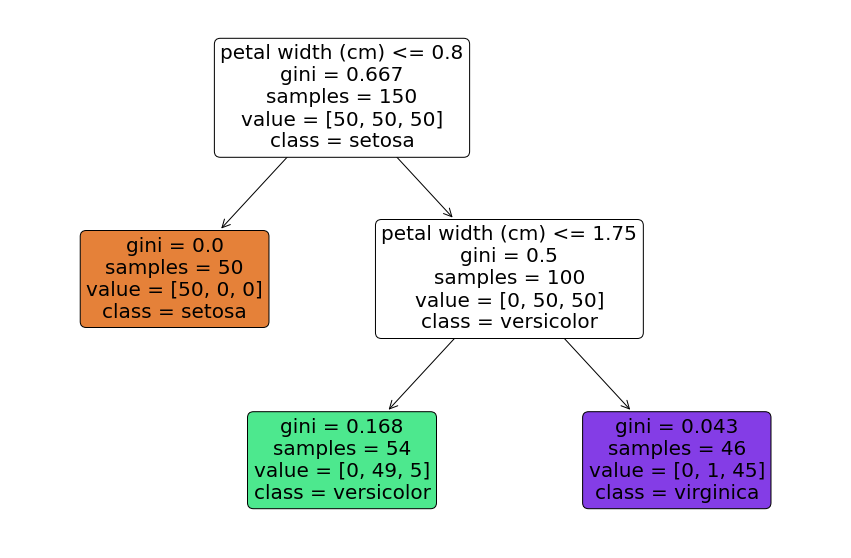

In [18]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt 

plt.figure(figsize=(15,10))  
plot_tree(tree_clf, feature_names=iris.feature_names[2:], class_names=iris.target_names, filled=True, fontsize=20, rounded=True)
plt.show()

## Making Predictions

To make predictions with a decision tree, you start at the root node (depth 0), and move down using the conditions in each node to determine which direction to go. You do this until you reach a *leaf node*. The leaf node does not ask any questions, you just look at the predicted class for that node. The leaf nodes are are the colored nodes shown above.

Notice that there was very little data preparation involved in training the decision tree. They do not require scaling or centering at all!

Each box in the figure above contains valuable information about the node. A node's `sample` attribute counts how many training instances it applies to. For example, 100 training instances have a petal width greater than 0.8 cm (depth 1, right), and of those 100, 54 have a petal width smaller than 1.75 cm (depth 2, left). A node's `value` attribute tells you how many training instances of each class this node applies to: for example, the bottom-right node applies to 0 *Iris setosa*, 1 *Iris versicolor*, and 45 *Iris virginica*. Finally, a node's `gini` attribute measures its *impurity*: a node is "pure" (`gini=0`) if all training instances it applies to belong to the same class. For example, since the depth-1 left node applies only to *Iris setosa* training instances, it is pure and its `gini` score is 0. The depth-2 left node has a `gini` score equal to $1-(0/54)^2-(49/54)^2-(5/54)^2\approx0.168$:

>Gini Impurity: $G_{i}=1-\sum^n_{k=1}p_{i, k}^2$

In this equation, $p_{i, k}$ is the ratio of class $k$ instances among the training instances in the $i^{\text{th}}$ node.

>Scikit-Learn uses the CART algorithm, which produces only *binary trees*: nonleaf nodes always have two children (i.e. questions can only have yes/no answers).